In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline # ^ 设置matplotlib使用Jupyter自己的后端，随后画的图会在notebook上呈现
%config InlineBackend.figure_format = 'svg' # ^ 在notebook上输出矢量图

UsageError: unrecognized arguments: # ^ 设置matplotlib使用Jupyter自己的后端，随后画的图会在notebook上呈现


# 开始画图：创建Figure与Axes

## fig画布
- 画图首先需要放置一张画布，由plt.figure()类创建

In [2]:
fig = plt.figure() # 创建class: plt.figure()的实例对象fig

<Figure size 432x288 with 0 Axes>

- 参数：fig = plt.figure('picture_1', # 画布名称（字符串）或编号（数字）
                 figsize=(4,3), # 指定画布的宽*高，单位：英寸
                 dpi=100, # 指定分辨率
                 facecolor='b', # 背景颜色
                 edgecolor='w', # 边框颜色
                 frameon=True) # 是否显示边框

## axes标架
- 一张画布上可以有多个标架（子图），由plt.axes()类创建

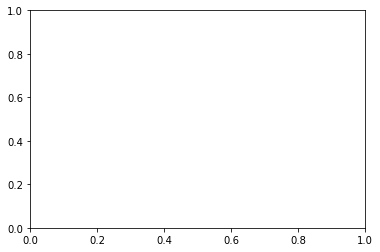

In [3]:
ax = plt.axes()

## fig.add_subplot(): 在fig上创建多个axes（子图）

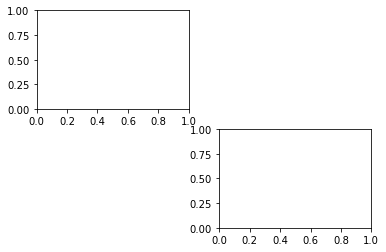

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 4)
# * 随后执行的画图命令将画在最后创建的axes上

## plt.subplots(): 快速创建fig与ax
- fig.add_subplot()随用随创建ax
- 而plt.subplots()一口气创建了所有的axes

### figure上只有一个axes

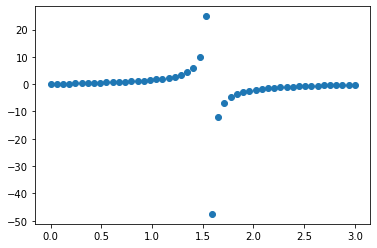

In [5]:
fig, ax = plt.subplots() # 直接创建fig和ax实例对象

x = np.linspace(0, 3)
y = np.tan(x)
ax.scatter(x, y)

### figure上有多个axes

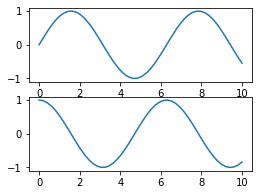

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(4,3)) # 2行，1列

ax1 = ax[0]
ax2 = ax[1]
x = np.linspace(0,10)
y1 = np.sin(x)
y2 = np.cos(x)
ax1.plot(x, y1)
ax2.plot(x, y2)

/var/folders/g1/tgfdzx0911x92svng3jbt2_h0000gn/T/ipykernel_1733/3241576141.py:7: RuntimeWarning: invalid value encountered in arcsin
  ax[1, 2].plot(x, np.arcsin(x)) # 第二中索引方式


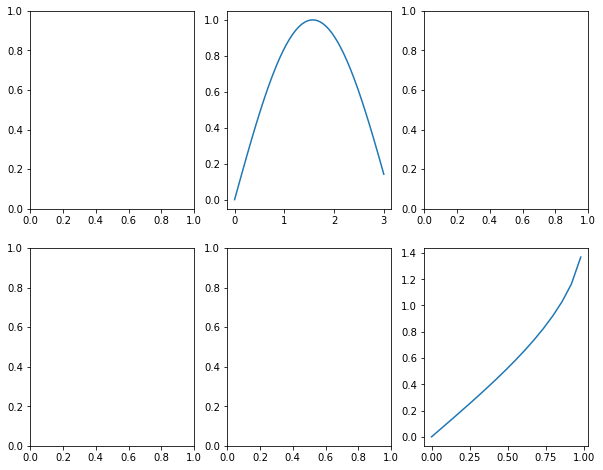

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))

x = np.linspace(0, 3)
# 在第1行的第2个axes中画图
ax[0][1].plot(x, np.sin(x)) # 第一种索引方式
# 在第2行的第3个axes中画图
ax[1, 2].plot(x, np.arcsin(x)) # 第二中索引方式

In [8]:
print('可见创建的ax实例对象是一个2*3的数组，其中元素为每个子图的axes')
ax

可见创建的ax实例对象是一个2*3的数组，其中元素为每个子图的axes


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

### plt.subplot()的参数
|参数|说明|
|---|---|
|sharex|所有子图都用相同的x轴刻度|
|sharey|所有子图都用相同的y轴刻度|

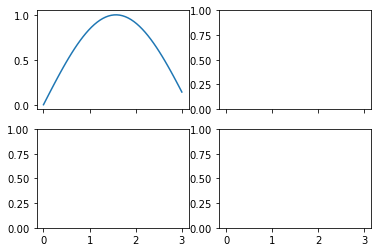

In [9]:
fig, ax = plt.subplots(2, 2, sharex=True)

x = np.linspace(0, 3)
ax[0][0].plot(x, np.sin(x))




---

# 子图
- 子图就是一个figure中有多个axes

## plt.subplots_adjust()：调整子图间距
参数列表（数据类型都是数字）：

| 参数 | 说明 |
| -- | -- |
|wspace|子图之间的横向宽度与子图横轴宽度的比值|
|hspace|子图之间的纵向高度与子图纵轴高度的比值|

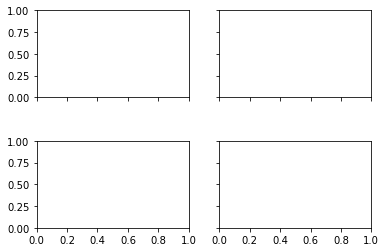

In [10]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 可见子图的横向间距与子图宽度的0.2相同；纵向间距与子图高度的0.5相同

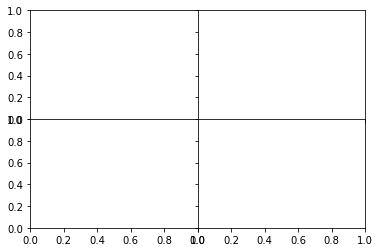

In [11]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0) # 无间距的子图

# 颜色、线型、标记

## color='颜色名'
- 设置颜色有9种方法，详见：[Color Demo](https://matplotlib.org/stable/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py)
- 基础颜色列表：

字符 | 颜色
-- | -- 
`‘b’`|	蓝色，blue
`‘g’`|	绿色，green
`‘r’`|	红色，red
`‘c’`|	青色，cyan
`‘m’`|	品红，magenta
`‘y’`|	黄色，yellow
`‘k’`|	黑色，black
`‘w’`|	白色，white



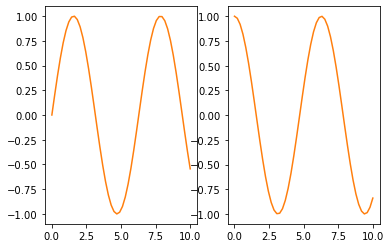

In [12]:
fig, ax = plt.subplots(1, 2)

x = np.linspace(0, 10)
# 输入颜色名，颜色表：/Users/zhurui/Documents/Quik look/matplotlib颜色表.png
ax[0].plot(x, np.sin(x), color='tab:orange')
# 输入颜色码
ax[1].plot(x, np.cos(x), color='#ff7f0e')

[颜色表](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)


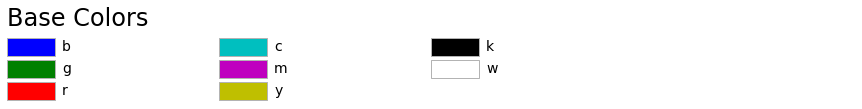

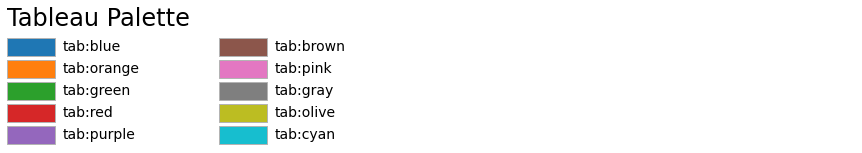

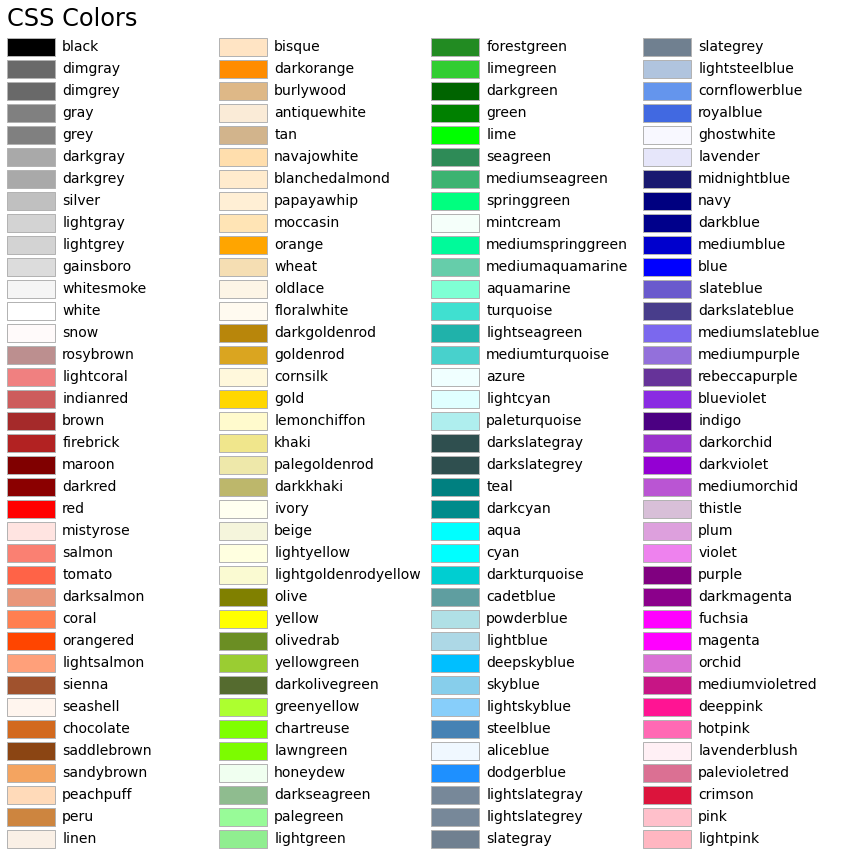

In [13]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")
#plt.savefig("/Users/zhurui/Documents/1_Quik Look/matplotlib颜色表.png", dpi = 1000)
# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("/Users/zhurui/Documents/1_Quik Look/XKCD_Colors.png", dpi=200)

plt.show()


## linestyle='线型'

字符|类型 | 字符|类型
---|--- | --- | ---
`  '-'	`| 实线 | `'--'`|	虚线
`'-.'`|	虚点线 | `':'`|	点线
`'dotted'`|点线|`'solod'`|实线
`'dashed'`|虚线|`'dashdot'`|虚点线

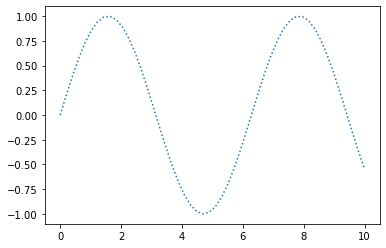

In [14]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x), linestyle=':')

## marker='标记数据点'

字符|类型 | 字符|类型
---|--- | --- | ---
`  '-'	`| 实线 | `'--'`|	虚线
`'-.'`|	虚点线 | `':'`|	点线
`'.'`|	点 | `','`| 像素点
`'o'`	|圆点 | `'v'`|	下三角点
`'^'`|	上三角点 | `'<'`|	左三角点
`'>'`|	右三角点 | `'1'`|	下三叉点
`'2'`|	上三叉点 | `'3'`|	左三叉点
`'4'`|	右三叉点 | `'s'`|	正方点
`'p'`	| 五角点 | `'*'`|	星形点
`'h'`|	六边形点1 | `'H'`|	六边形点2 
`'+'`|	加号点 | `'x'`|	乘号点
`'D'`|	实心菱形点 | `'d'`|	瘦菱形点 
`'_'`|	横线点 | |



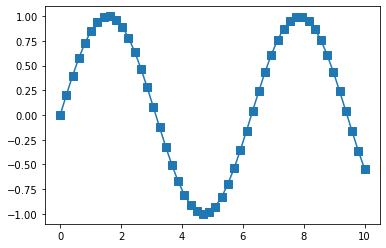

In [15]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x), linestyle='-', marker='s', markersize=8)

# 坐标轴

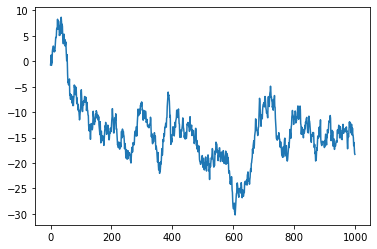

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

## ax.set_xlim()：设置坐标范围

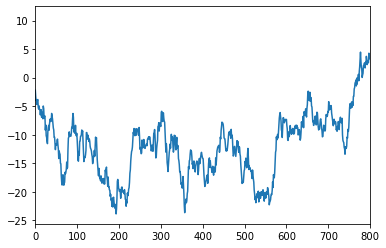

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 800)
ax.plot(np.random.randn(1000).cumsum())

## ax.set_xticks(): 设置想要显示的刻度值

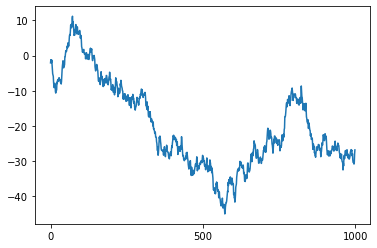

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 500, 1000]) # 显示想要显示的刻度值
ax.plot(np.random.randn(1000).cumsum())

## ax.set_xticklabels(): 更改刻度名称

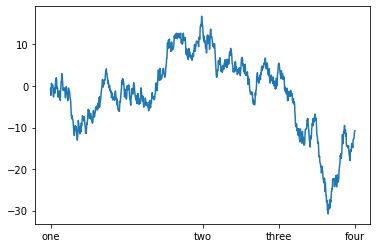

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 500, 750, 1000]) # 显示想要显示的刻度值
labels = ax.set_xticklabels(['one', 'two', 'three', 'four']) # 更改刻度名称
ax.plot(np.random.randn(1000).cumsum())

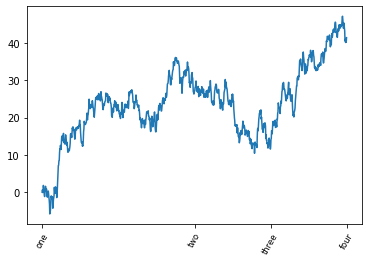

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 500, 750, 1000]) # 显示想要显示的刻度值
labels = ax.set_xticklabels(
    ['one', 'two', 'three', 'four'], 
    rotation=60, 
    fontsize='small'
) # 更改刻度名称，自定义设置
ax.plot(np.random.randn(1000).cumsum())

## ax.set_xlabel()：设置坐标轴标签

Text(0.5, 0, 'Stages')

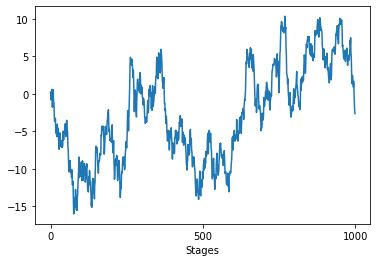

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ticks = ax.set_xticks([0, 500, 1000]) # 显示想要显示的刻度值

ax.plot(np.random.randn(1000).cumsum())

ax.set_xlabel('Stages')

# 标题、图例

## ax.set_title(): 设置标题

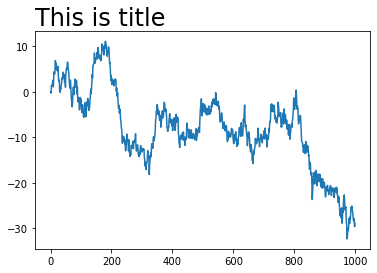

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_title('This is title', fontsize=24, loc="left")

ax.plot(np.random.randn(1000).cumsum())

## ax.legend()：显示图例

### 添加图例的最简单的方式：在画图时传入label参数

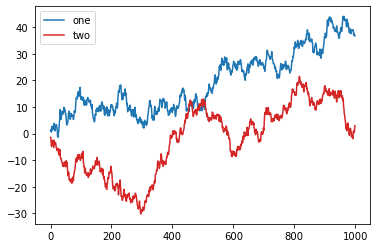

In [23]:
from numpy.random import randn

fig, ax = plt.subplots()

ax.plot(randn(1000).cumsum(), c='tab:blue', label='one')
ax.plot(randn(1000).cumsum(), c='tab:red', label='two')

ax.legend()

### ax.legend()也可以批量创建图例

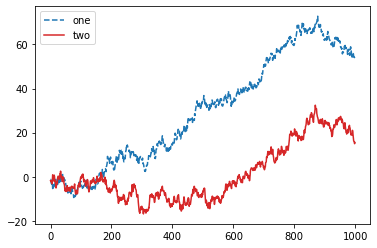

In [24]:
from numpy.random import randn

fig, ax = plt.subplots()

# ! 注意逗号， 注意要为每条线创建对象名
line1, = ax.plot(randn(1000).cumsum(), c='tab:blue', linestyle='--')
line2, = ax.plot(randn(1000).cumsum(), c='tab:red', linestyle='-')

ax.legend((line1, line2), ('one', 'two'))

### ax.legend()中的参数
- loc='位置'
        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============
- fontsize='大小'

fontsize : int or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}

- labelcolor='颜色名'

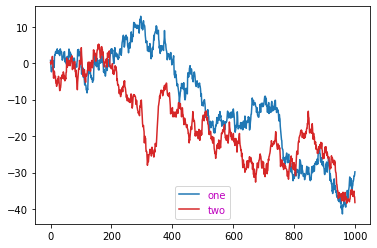

In [25]:
from numpy.random import randn

fig, ax = plt.subplots()

ax.plot(randn(1000).cumsum(), c='tab:blue', label='one')
ax.plot(randn(1000).cumsum(), c='tab:red', label='two')

ax.legend(loc='lower center', fontsize=10, labelcolor='m')

## line.set_label()：创建图例
- 添加图例的最简单的方式：在画图时传入label参数（见上）

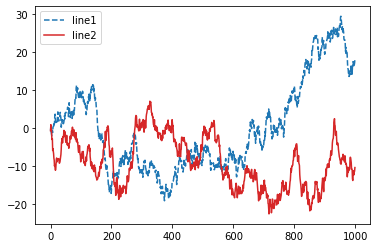

In [26]:
from numpy.random import randn

fig, ax = plt.subplots()

# ! 注意逗号， 注意要为每条线创建对象名
line1, = ax.plot(randn(1000).cumsum(), c='tab:blue', linestyle='--')
line2, = ax.plot(randn(1000).cumsum(), c='tab:red', linestyle='-')
line1.set_label('line1')
line2.set_label('line2')
ax.legend()

# 标注

## ax.text()：指定位置添加文字
- ax.text(x, y, 'str', fontsize=10)

Text(200, 10, '(200, 10)')

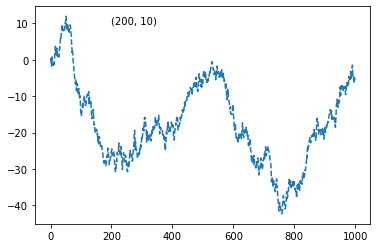

In [27]:
from numpy.random import randn

fig, ax = plt.subplots()

ax.plot(randn(1000).cumsum(), c='tab:blue', linestyle='--')

ax.text(200, 10, '(200, 10)')

## ax.annotate(): 添加注释
[官方文档](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html)

参数列表：

|参数|说明|
|--|--|
|text|注释文字|
|xy|注释点的坐标|
|xytext|注释文字的坐标|
|arrowprops|设置箭头类型|
|xycoords|坐标系种类|
|textcoords|???|


### 给标记点写注释

Text(4.3, -0.25, 'local min')

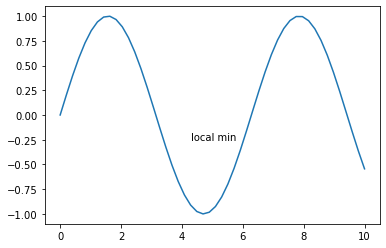

In [28]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x))

ax.annotate('local min', 
            xy=(4.7, -1), 
            xytext=(4.3, -0.25), 
           )

### 设置箭头：自带箭头样式
- 样式列表：
|Name|描述|
|--|--|
|'-'|直线|
|'->'|指向数据点的箭头|
|'-]'|数据点端有方括号|
| '\|-\|' |直线两端有小横|
|'<-'|指向注释的箭头|
|'<->'|双向箭头|
|'fancy'|花哨箭头|
|'simple'|比默认款细|
|'wedge'|楔子|

Text(4.3, -0.25, 'local min')

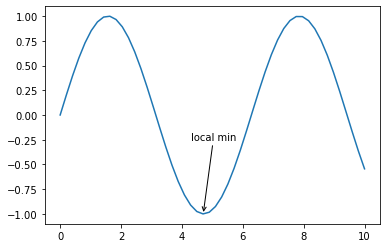

In [29]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x))

ax.annotate('local min', 
            xy=(4.7, -1), 
            xytext=(4.3, -0.25), 
            arrowprops=dict(arrowstyle='->')
           )

### 设置箭头：自定义箭头样式
- 参数列表：

|参数|描述|
|---|---|
|shrink|数据点到注释之间未被箭头填充的空白区长度|
|facecolor|箭头填充颜色|
|headwidth|箭头尖的宽度|
|headlength|箭头尖的长度|
|width|箭头棒的宽度|
|horizontalalignment|注释水平位置|
|verticalalignment|注释垂直位置|

Text(4.3, -0.25, 'local min')

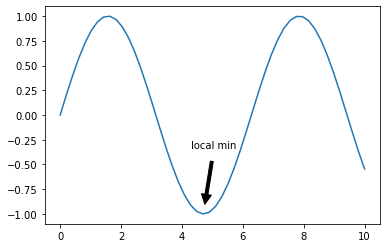

In [30]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x))

ax.annotate('local min', 
            xy=(4.7, -1), 
            xytext=(4.3, -0.25), 
            arrowprops=dict(shrink=0.15, 
                            facecolor='black', 
                            headwidth=10, 
                            headlength=10,
                            width=3), 
            horizontalalignment='left', 
            verticalalignment='top'
           )

# 绘制图形

## ax.add_patch()：添加图形块
- 使用函数创建图形对象，再用ax.add_patch()画在图上
- 参数格式：plt.Rectangle((左下顶点的x坐标, y坐标), 宽, 高, color='m', alpha=0.3)

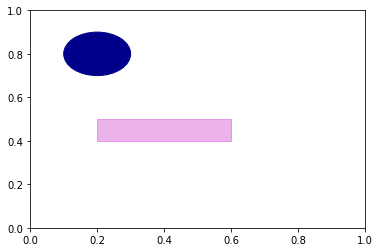

In [31]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.4), 0.4, 0.1, color='m', alpha=0.3)
circ = plt.Circle((0.2, 0.8), 0.1, color='darkblue')

ax.add_patch(rect)
ax.add_patch(circ)

# 保存图片
- 参数列表：

|参数|描述|
|--|--|
|dpi|分辨率（每英寸点数）|
|bbox_inches|剪除图片边缘空白部分|
|facecolor|背景色|
|edgecolor|背景色|

In [32]:
'''
plt.savefig('filename.png', dpi=300, bbox_inches='tight', facecolor = 'w')

# 保存成pdf更清楚
plt.savefig('filename.pdf', bbox_inches='tight' )

# 若只保存, 不想显示,则在save后加上
plt.close()
'''


"\nplt.savefig('filename.png', dpi=300, bbox_inches='tight', facecolor = 'w')\n\n# 保存成pdf更清楚\nplt.savefig('filename.pdf', bbox_inches='tight' )\n"

# 条形图
- 条形图不同于直方图，条形的宽度只表示类别，长度表示类别的频数

## ax.bar()：垂直条形图
align参数可选
- 'center'：标签居中
- 'edge'：标签左对齐

<BarContainer object of 6 artists>

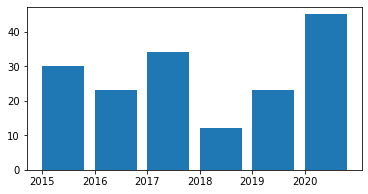

In [33]:
fig, ax = plt.subplots(figsize=(6, 3))

ls_label = ['2015', '2016', '2017', '2018', '2019', '2020'] # 横坐标刻度显示类别
ls_num = [30, 23, 34, 12, 23, 45]

ax.bar(ls_label, ls_num, align='edge')

## ax.barh()：水平条形图

<BarContainer object of 6 artists>

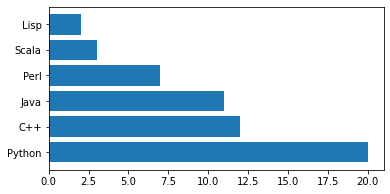

In [34]:
fig, ax = plt.subplots(figsize=(6, 3))

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
performance = [20, 12, 11, 7, 3, 2]

ax.barh(objects, performance)